In [1]:
#2021-07-10
#Hamed Baghal Ghaffari
#This code produces the truncated prolate matrix which is
#doubly-tridiagonal.
def prolatematrix(c,m): 
    M=matrix(CC,m)
    for i in range(m-2): 
        M[i,i+2]=(4*pi**2*c**2)*(i+2)*(i+1)/((2*i+3)*sqrt((2*i+5)*(2*i+1)))
    for i in range(m):
        M[i,i]=(i+1)*i+((4*pi**2*c**2)*(2*i**2+2*i-1))/((2*i+3)*(2*i-1))
    for i in range(m-2):
        M[i+2,i]=(4*pi**2*c**2)*(i+2)*(i+1)/((2*i+3)*sqrt((2*i+5)*(2*i+1)))
    return M

In [2]:
A=prolatematrix(1,3)

In [3]:
A.nrows()

3

In [4]:
A.ncols()

3

In [5]:
print(A)

[ 13.1594725347858 0.000000000000000  11.7701900543290]
[0.000000000000000  25.6870505626145 0.000000000000000]
[ 11.7701900543290 0.000000000000000  26.6791711260920]


In [6]:
def coefficientprolate(c,m,n):
    A=prolatematrix(c,m)
    B=A.eigenvectors()
    return B

In [7]:
A.eigenvalues()


/Applications/sages/SageMath-8.7.app/Contents/Resources/sage/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: UserWarning: Using generic algorithm for an inexact ring, which will probably give incorrect results due to numerical precision issues.
  from ipykernel.kernelapp import IPKernelApp


[33.4925652311508, 25.6870505626144, 6.34607842972707]

In [8]:
A.eigenvectors()

AttributeError: 'sage.matrix.matrix_generic_dense.Matrix_generic_dense' object has no attribute 'eigenvectors'

In [9]:
#I couldn't use the command of "eigenvectors" for obtaining eigenvectors. So I had to use python modules.
import numpy as np
import numpy.linalg as linalg
def coefficientprolate(c,m,n):
    A=prolatematrix(c,m)
    eigenValues, eigenVectors = linalg.eig(A)
    idx = eigenValues.argsort()[::+1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenVectors[:,n]

In [10]:
coefficientprolate(1,20,0)

array([ 8.25962692e-01+0.j, -2.44004963e-20+0.j, -5.37911167e-01+0.j,
        4.79363637e-20+0.j,  1.65922864e-01+0.j, -1.11363847e-20+0.j,
       -2.99117043e-02+0.j,  1.59361395e-21+0.j,  3.46753370e-03+0.j,
       -1.52304855e-22+0.j, -2.77405070e-04+0.j,  1.03346737e-23+0.j,
        1.61509774e-05+0.j, -5.21540169e-25+0.j, -7.12836558e-07+0.j,
        2.02926797e-26+0.j,  2.46259666e-08+0.j, -6.26426984e-28+0.j,
       -6.82781942e-10+0.j,  1.56930586e-29+0.j])

In [11]:
#This code computes the PSWFs. The plots are really nice.
def computeprolate(x,c,m,n):
        y=0
        W=coefficientprolate(c,m,n)
        for k in range(m):
            y=y+W[k]*(sqrt(k+1/2))*legendre_P(k,x)
        return y

In [12]:
n(computeprolate(.3,1,20,0))

0.907648146862812

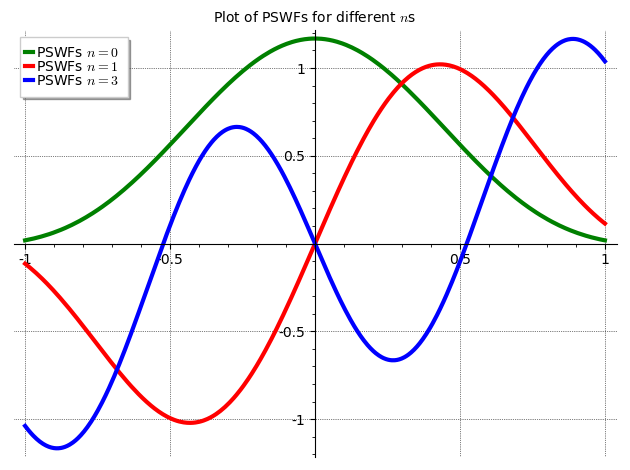

In [13]:
p0=plot(computeprolate(x,1,20,0), (x, -1, 1), thickness=3, color='green', legend_label='PSWFs $n=0$',title='Plot of PSWFs for different $n$s')
p1=plot(computeprolate(x,1,20,1), (x, -1, 1), thickness=3, color='red', legend_label='PSWFs $n=1$')
p3=plot(computeprolate(x,1,20,3), (x, -1, 1), thickness=3, color='blue', legend_label='PSWFs $n=3$')
show(p0+p1+p3,gridlines=True)

In [14]:
def linearcombevenlegendreatzero(c,m,n):
    T=0
    W=coefficientprolate(c,m,2*n)
    for j in range(m//2 - 1):
        T=T+W[2*j]*sqrt(2*j+(1/2))*(((-1)**(j))*(factorial(2*j)))/(math.factorial(j)*factorial(j)*2**(2*j))
    return T

In [15]:
n(linearcombevenlegendreatzero(1,20,0))

1.16812107606366

In [16]:
def linearcomboddlegendreatzero(c,m,n):
    T=0
    W=coefficientprolate(c,m,2*n+1)
    for j in range((m-1)//2):
        T=T+W[2*j+1]*sqrt(2*j+(3/2))*(((-1)**(j))*(factorial(2*j+2)))/(factorial(j)*factorial(j+1)*2**(2*j+1))
    return T

In [17]:
n(linearcomboddlegendreatzero(1,20,0))

3.82436460730509

In [18]:
def eveneigenvalueofprolate(c,m,n):
    W=coefficientprolate(c,m,2*n)
    y=(W[0]*sqrt(2))/(linearcombevenlegendreatzero(c,m,n))
    return y

In [19]:
n(eveneigenvalueofprolate(1,20,1))

-0.979484744826439

In [20]:
def oddeigenvalueofprolate(c,m,n):
    W=coefficientprolate(c,m,2*n+1)
    y=(1j*W[1]*sqrt(2/3)*2*pi*c)/(linearcomboddlegendreatzero(c,m,n))
    return y

In [21]:
F=n(abs(oddeigenvalueofprolate(1,20,1)))

In [22]:
F

-0.849559636343403

In [24]:
def PlottingEigenvalues(c,m,n):
    T=[]
    for i in range(n):
        T.append(abs(eveneigenvalueofprolate(c,m,2*i)))
        T.append(abs(oddeigenvalueofprolate(c,m,2*i+1)))
    return T

In [27]:
PlottingEigenvalues(1,40,6)

[((0.8259626917139042+0j))*sqrt(2)/(((5.990213800837357e-28+0j))*sqrt(73/2) + ((8.397260648282656e-26+0j))*sqrt(69/2) + ((1.0555040705891333e-23+0j))*sqrt(65/2) + ((1.1810893438756503e-21+0j))*sqrt(61/2) + ((1.168482699029325e-19+0j))*sqrt(57/2) + ((1.0139836819376008e-17+0j))*sqrt(53/2) + ((2.7389349078516395e-12+0j))*sqrt(41/2) + ((1.2671596424421331e-10+0j))*sqrt(37/2) + ((4.836065398803263e-09+0j))*sqrt(33/2) + ((1.4931976741611475e-07+0j))*sqrt(29/2) + ((6.826765383570063e-05+0j))*sqrt(21/2) + ((0.0009481537464565486+0j))*sqrt(17/2) + ((0.009347407608034795+0j))*sqrt(13/2) + ((0.2689555836668365+0j))*sqrt(5/2) + ((1.0126441312030072+0j))*sqrt(1/2)),
 1.2764156604960881*sqrt(2/3)*pi/(((-1.1214113602930913e-23+0j))*sqrt(71/2) + ((-1.3733083166785383e-21+0j))*sqrt(67/2) + ((-1.4286624055114254e-17+0j))*sqrt(59/2) + ((-1.1938148645710568e-15+0j))*sqrt(55/2) + ((-8.621312396740977e-14+0j))*sqrt(51/2) + ((-5.317752492964184e-12+0j))*sqrt(47/2) + ((-2.7629965307370447e-10+0j))*sqrt(43/2)

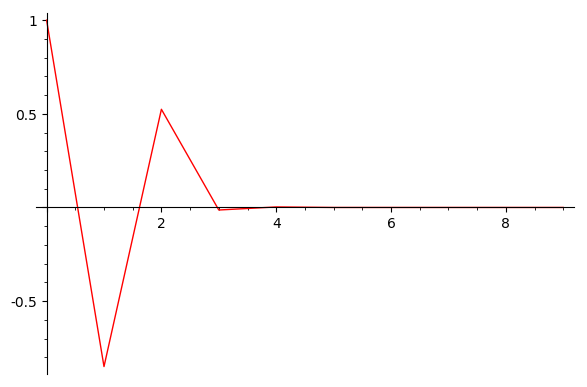

In [30]:
#Please enter n 
#As you will see there is another problem. 
n=5
T=PlottingEigenvalues(1,20,n)
r = [T[i] for i in range(2*n)]
p1=list_plot(r, color='red',plotjoined=True)
show(p1)